## Домашняя работа по теме "Алгоритм линейной регрессии. Градиентный спуск"

1. Подберите скорость обучения (eta) и количество итераций

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

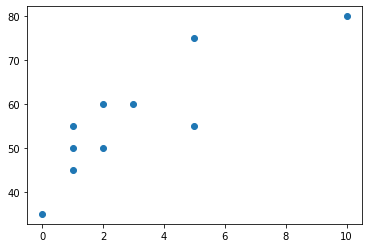

In [4]:
plt.scatter(X[:, 1], y);

In [5]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [6]:
n = X.shape[0]

eta = 1e-2 
n_iter = 100


def gradient_func(n_iter, eta):
    W = np.array([1, 0.5])
    print(f'\nКол-во шагов = {n_iter} \
       \nНачальная скорость обучения = {eta} \
       \nИсходные веса = {W} \n')
    for i in range(n_iter):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        for k in range(W.shape[0]):
            W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
        if i % 10 == 0:
            eta /= 1.1
    print(f'Полученные веса: {W}, MSE: {err}\n\n************')
    y_pred_grad = X @ W
    plt.scatter(X[:, 1], y)
    plt.plot(X[:, 1], y_pred_grad, label='gradient descent', c='g')
    plt.legend()
    plt.show()
    

Рассмотрим варианты с шагами от 100 до 10000 и со скоростью обучения 0.01


Кол-во шагов = 100        
Начальная скорость обучения = 0.01        
Исходные веса = [1.  0.5] 

Полученные веса: [21.21171007  8.13747302], MSE: 313.79056939389363

************


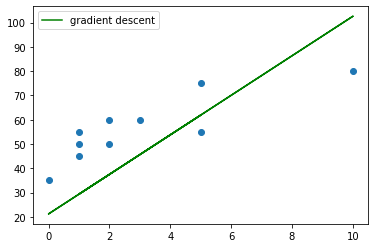


Кол-во шагов = 1000        
Начальная скорость обучения = 0.01        
Исходные веса = [1.  0.5] 

Полученные веса: [28.3450269   6.84395599], MSE: 175.59845939295684

************


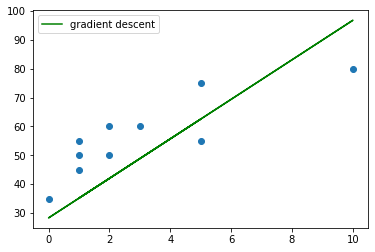


Кол-во шагов = 10000        
Начальная скорость обучения = 0.01        
Исходные веса = [1.  0.5] 

Полученные веса: [28.34614428  6.84375337], MSE: 175.58068979510114

************


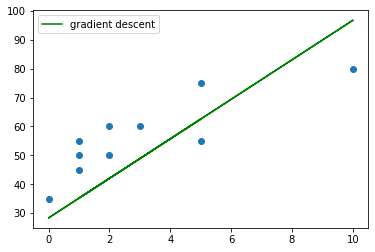

In [7]:
gradient_func(100, 0.01)
gradient_func(1000, 0.01)
gradient_func(10000, 0.01)

Не имеет смысла увеличивать кол-во шагов более 1000, так как среднеквадратичная ошибка изменяется не сильно.

Рассмотрим варианты с шагами от 100 до 1000 и со скоростью обучения 0.001


Кол-во шагов = 100        
Начальная скорость обучения = 0.001        
Исходные веса = [1.  0.5] 

Полученные веса: [5.08129343 9.81446571], MSE: 816.3262099558121

************


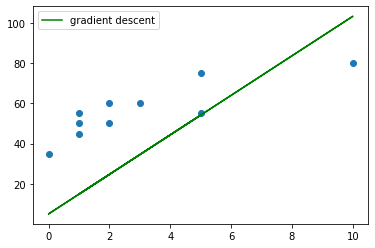


Кол-во шагов = 1000        
Начальная скорость обучения = 0.001        
Исходные веса = [1.  0.5] 

Полученные веса: [ 6.63189695 10.46434062], MSE: 739.2733444715413

************


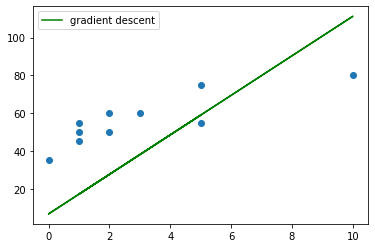

In [8]:
gradient_func(100, 0.001)
gradient_func(1000, 0.001)

Чем ниже скорость обучения и меньше шагов, тем больше ошибка.

Рассмотрим варианты с шагами от 100 до 1000 и со скоростью обучения 0.1


Кол-во шагов = 100        
Начальная скорость обучения = 0.1        
Исходные веса = [1.  0.5] 

Полученные веса: [ 35.08942614 -50.48848428], MSE: 429685.32758140273

************


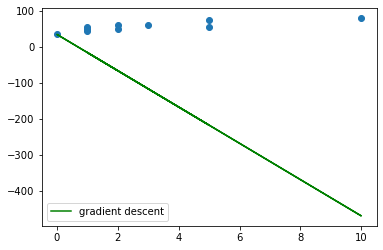


Кол-во шагов = 1000        
Начальная скорость обучения = 0.1        
Исходные веса = [1.  0.5] 

Полученные веса: [45.05909181  3.81311802], MSE: 43.96875547099612

************


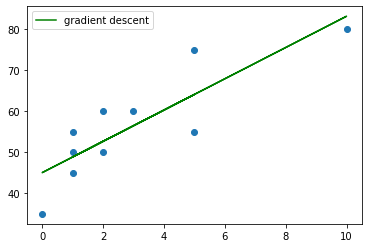

In [9]:
gradient_func(100, 0.1)
gradient_func(1000, 0.1)

__При скорости обучения 0.1 самые лучшие показатели с наименьшей ошибкой при количестве итераций, равном 1000.__

2*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [10]:
n = X.shape[0]

eta = 1e-2 
n_iter = 100

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    # ИЗМЕНЕНИЯ
    W -= eta * (1/n * 2 * np.dot(X, y_pred - y))
    # ИЗМЕНЕНИЯ
    #
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 



ValueError: shapes (10,2) and (10,) not aligned: 2 (dim 1) != 10 (dim 0)

In [11]:
X.shape

(10, 2)

In [12]:
(y-y_pred).shape

(10,)

Ошибка заключается в перемножении матрицы на вектор. Для выполнения умножения нужно, чтобы количество столбцов первой матрицы было равно количеству строк второй матрицы.
Для исправления этой ошибки можно транспонировать первую матрицу. Проверим:

In [13]:
n = X.shape[0]

eta = 1e-2 
n_iter = 100

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    # ИСПРАВЛЕНИЕ ОШИБКИ
    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y))
    # ИЗМЕНЕНИЯ
    #
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27


3*. Вместо того, чтобы задавать количество итераций, задайте другое условие останова алгоритма - когда веса перестают изменяться меньше определенного порога  𝜖 .

In [18]:
n = X.shape[0]

eta = 1e-2 

w = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# максимальное число итераций
max_iter = 10000

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 0.000001

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y):
    y_pred = X.dot(w)
    return (np.sum((y_pred - y)**2)) / len(y)

while weight_dist > min_weight_dist and iter_num < max_iter:
    y_pred = np.dot(X, w)
    dQ = 2 / n * np.dot(X.T, y_pred - y)
    new_w = w - eta * dQ
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    error = mserror(X, new_w, y)
    
    w_list.append(new_w.copy())
    errors.append(error)
    
    print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
w_pred = w_list[-1]

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')


Number of objects = 10        
Learning rate = 0.01        
Initial weights = [28.22929764  6.86494171] 

Iter 0: error - 1777.0353, weights: [2.08 4.27]
Iter 1: error - 1233.1246862399998, weights: [2.9122 6.6934]
Iter 2: error - 995.6119136616959, weights: [3.582352 8.242912]
Iter 3: error - 887.3532060945618, weights: [4.14613024 9.2253808 ]
Iter 4: error - 833.705103731704, weights: [4.63968479 9.83998351]
Iter 5: error - 803.2133893510008, weights: [ 5.08649208 10.21600803]
Iter 6: error - 782.6219704436712, weights: [ 5.50180176 10.43737578]
Iter 7: error - 766.3427039405008, weights: [ 5.89552318 10.55855991]
Iter 8: error - 752.0184356756685, weights: [ 6.27409912 10.61491815]
Iter 9: error - 738.6534565814403, weights: [ 6.64172205 10.62940003]
Iter 10: error - 725.8257570810141, weights: [ 7.0011236 10.6169007]
Iter 11: error - 713.3551043907684, weights: [ 7.35408709 10.58708704]
Iter 12: error - 701.1631838639862, weights: [ 7.70178013 10.54623222]
Iter 13: error - 689.2146

Iter 695: error - 43.97116263376737, weights: [44.99092858  3.82547837]
Iter 696: error - 43.97111882835498, weights: [44.9915813   3.82536001]
Iter 697: error - 43.97107581830331, weights: [44.99222807  3.82524273]
Iter 698: error - 43.97103358917125, weights: [44.99286895  3.82512652]
Iter 699: error - 43.97099212677991, weights: [44.99350398  3.82501136]
Iter 700: error - 43.970951417207836, weights: [44.99413322  3.82489726]
Iter 701: error - 43.97091144678631, weights: [44.99475672  3.8247842 ]
Iter 702: error - 43.97087220209483, weights: [44.99537453  3.82467217]
Iter 703: error - 43.97083366995653, weights: [44.99598671  3.82456116]
Iter 704: error - 43.97079583743384, weights: [44.99659331  3.82445116]
Iter 705: error - 43.97075869182405, weights: [44.99719437  3.82434217]
Iter 706: error - 43.9707222206551, weights: [44.99778995  3.82423417]
Iter 707: error - 43.97068641168138, weights: [44.9983801   3.82412715]
Iter 708: error - 43.970651252879655, weights: [44.99896487  3.8

Iter 1359: error - 43.96875001254604, weights: [45.06233679  3.8125296 ]
Iter 1360: error - 43.96875001231823, weights: [45.06233828  3.81252933]
Iter 1361: error - 43.96875001209457, weights: [45.06233975  3.81252906]
Iter 1362: error - 43.96875001187498, weights: [45.06234121  3.81252879]
Iter 1363: error - 43.96875001165937, weights: [45.06234266  3.81252853]
Iter 1364: error - 43.968750011447675, weights: [45.0623441   3.81252827]
Iter 1365: error - 43.96875001123982, weights: [45.06234552  3.81252801]
Iter 1366: error - 43.96875001103575, weights: [45.06234693  3.81252776]
Iter 1367: error - 43.96875001083537, weights: [45.06234832  3.8125275 ]
Iter 1368: error - 43.96875001063863, weights: [45.06234971  3.81252725]
Iter 1369: error - 43.968750010445476, weights: [45.06235108  3.812527  ]
Iter 1370: error - 43.96875001025581, weights: [45.06235244  3.81252676]
Iter 1371: error - 43.96875001006961, weights: [45.06235378  3.81252651]
Iter 1372: error - 43.96875000988678, weights: [4

Таким образом, задав порог $𝜖 = 10^{-6}$ (разница весов, при которой алгоритм останавливается) при количестве итерации, равном 10000, нам потребовалось использовать только 1406 итераций.